In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

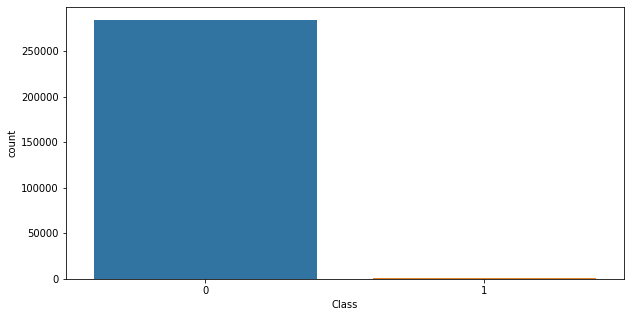

In [5]:
#comparing no. of fraudulent(1) or otherwise cases(0)
plt.figure(figsize=(10,5))
sns.countplot(df['Class'])

In [6]:
len(df[df['Class'] == 1])/len(df['Class'])*100
# 0.17% of the data is about fraudulent transfers which is detrimental to the model as overfitting with occur 
'''since I dont know what the columns stand for (due to privacy reasons) I cant know the true correlation between class and the features
as correlation is heavily reliant on non-fraudulent cases '''

'since I dont know what the columns stand for (due to privacy reasons) I cant know the true correlation between class and the features\nas correlation is heavily reliant on non-fraudulent cases '

In [7]:
'''In order for this analysis to be meaning full i will be creating a sub sample of the dataset with a 50-50 ratio of
fraudulent and non-fraudulent data'''

'In order for this analysis to be meaning full i will be creating a sub sample of the dataset with a 50-50 ratio of\nfraudulent and non-fraudulent data'

In [8]:
len(df[df['Class'] == 1])

492

In [9]:
#randomly shuffling the data 
df = df.sample(frac = 1)
#taking all the fraudulent cases and random non-fraudulent cases
df_fraud = df.loc[df['Class'] == 1]
df_nfraud = df.loc[df['Class'] == 0][:492]
df_new = pd.concat([df_fraud,df_nfraud])
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10498,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,0.159387,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93,1
154587,102114.0,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,...,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,0.00,1
42945,41308.0,-13.680760,6.990389,-13.770001,8.694897,-11.426968,-2.919845,-14.594562,8.622905,-8.090697,...,2.989553,0.497599,-0.509290,0.732503,0.280528,0.280037,-1.406687,-0.663643,0.76,1
235634,148476.0,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,...,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1
191359,129222.0,1.177824,2.487103,-5.330608,5.324547,1.150243,-1.281843,-1.171994,0.413778,-2.659840,...,0.262325,-0.431790,-0.092088,0.145216,0.457788,0.167739,0.451243,0.268421,4.87,1


In [10]:
df_new['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

<AxesSubplot:>

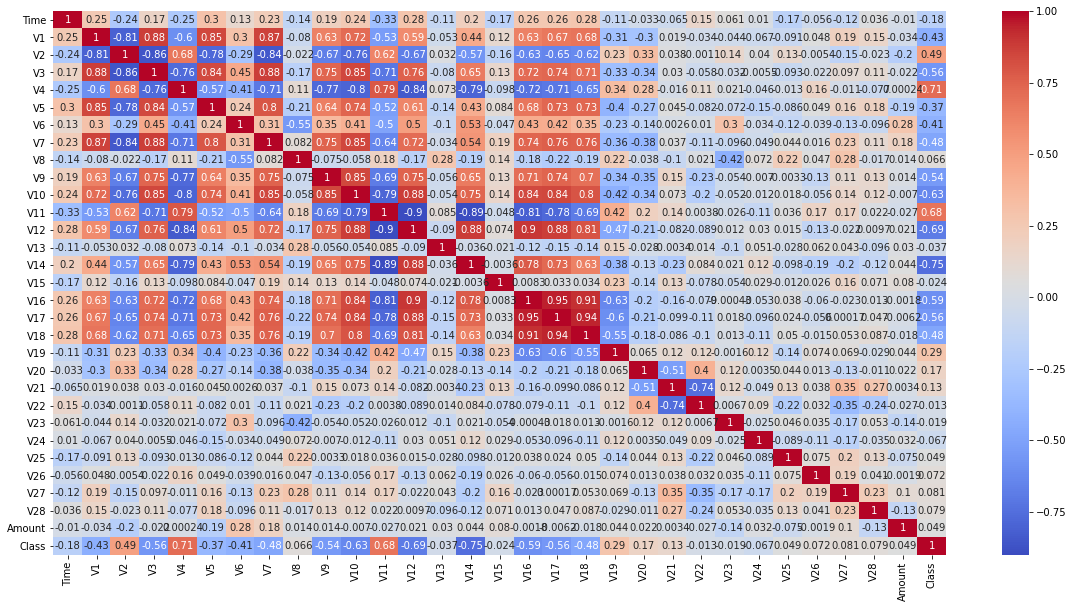

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(), cmap='coolwarm', annot = True)

In [12]:
#There are many strong correlations 
#Strongest positives: V17/V16, V18/V16, V18/V17, V12/V10, V16/V12, V17,V12
#Strongest negatives: V12/V11, V14/V11, V16,17,18/V11
#V11 is negatively correlated to most other elements same with V4 and V2
df_new['V1'].describe()

count    984.000000
mean      -2.429187
std        5.506231
min      -30.552380
25%       -2.890518
50%       -0.860544
75%        0.914621
max        2.358701
Name: V1, dtype: float64

In [13]:
#using principal component analysis

In [14]:
df_new.columns[1:-1]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [15]:
X = df_new[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df_new['Class']


In [16]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
accuracy_score(y_test,predict)

0.7886178861788617

In [20]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       121
           1       0.93      0.63      0.75       125

    accuracy                           0.79       246
   macro avg       0.82      0.79      0.78       246
weighted avg       0.82      0.79      0.78       246



In [21]:
#using gridsearchcv to obtain the best parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,10,100,1000],'gamma':[1,0.01,0.1,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose = 3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.507, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.500, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.500, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.503, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.503, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.818, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.784, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.830, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.565, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.612, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.932, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.899, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.892, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.932, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.905, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.01, 0.1, 0.001]},
             verbose=3)

In [23]:
grid_predict = grid.predict(X_test)

In [24]:
accuracy_score(y_test,grid_predict)

0.9146341463414634

In [25]:
# a significant increase in accuracy using the best parameters searched by Gridsearchcv